# Softmax Regression
- Install Keras from PyPI (recommended):
```
pip install keras==2.1.5```

In [0]:
%matplotlib inline
import keras
print('Keras version : %s' % keras.__version__)

Keras version : 2.1.6


In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import model_from_json
from PIL import Image
import livelossplot
import pandas as pd
from matplotlib import pyplot

from matplotlib import pyplot as plt
from IPython.display import clear_output

Using TensorFlow backend.


In [0]:
batch_size = 128
nb_classes = 10
nb_epoch = 20

11493376/11490434 [==============================] - 4s 0us/step


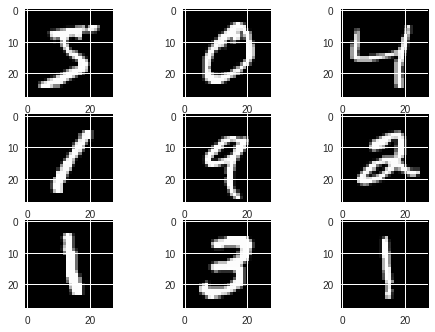

In [3]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
for i in range(0, 9):
    x = 330 + 1 + i
    #print(x)
    pyplot.subplot(x)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()


X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_Train = np_utils.to_categorical(y_train, nb_classes)
Y_Test = np_utils.to_categorical(y_test, nb_classes)

In [0]:
plot_losses = livelossplot.PlotLossesKeras()

In [8]:
# Logistic regression model
model = Sequential()
model.add(Dense(10, input_shape=(784,), kernel_initializer ='normal', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy', 'mean_squared_error'])

#model.add(Dense(12, input_dim=8, kernel_initializer ='uniform', activation='relu'))
#model.add(Dense(8, kernel_initializer ='uniform', activation='relu'))
#model.add(Dense(1, kernel_initializer ='uniform', activation='sigmoid'))


print(model.summary())
#print(model.get_config())
#print(model.to_json())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


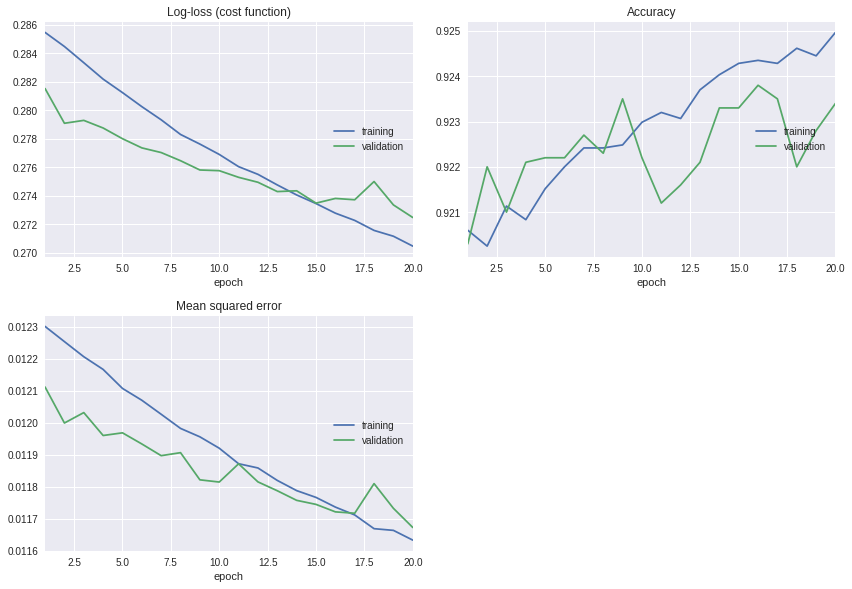

In [13]:
# Train
# > val_loss is the value of cost function for your cross validation data 
#   and loss is the value of cost function for your training data
history = model.fit(X_train, Y_Train, 
                    nb_epoch=nb_epoch, validation_data=(X_test, Y_Test), 
                    batch_size=batch_size, verbose=1,
                    callbacks=[plot_losses])

dict_keys(['val_loss', 'val_acc', 'val_mean_squared_error', 'loss', 'acc', 'mean_squared_error'])


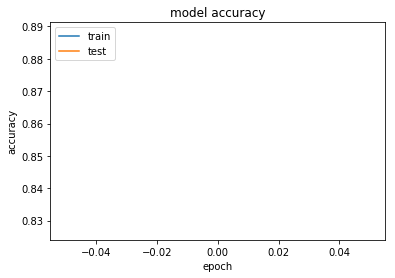

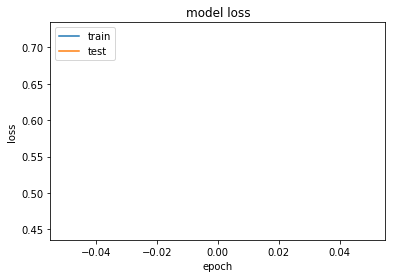

In [0]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Evaluate
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

10000/10000 [==============================] - 0s 39us/step
Summary: Loss over the test dataset: 0.45, Accuracy: 0.89


In [0]:
# serialize model to JSON
model_json = model.to_json()
with open("./data/04/04_softmax_regression.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("./data/04/04_softmax_regression.h5")
#print (model.get_weights())
print("Saved model to disk")

Saved model to disk


In [0]:
# load json and create model
json_file = open('./data/04/04_softmax_regression.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./data/04/04_softmax_regression.h5")
#print (model.get_weights())
print("Loaded model from disk")

Loaded model from disk


In [0]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = model.evaluate(X_test, Y_Test, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

10000/10000 [==============================] - 0s 37us/step
acc: 88.82%


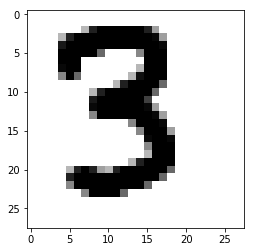

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_load = mpimg.imread('./media/MNIST Test/test3.png')
imgplot = plt.imshow(img_load)

In [0]:
pd.DataFrame(model.predict(X_test[1].reshape(1,784)))
#print(X_train[20].reshape(1,784))

,0,1,2,3,4,5,6,7,8,9
0,0.035386,0.005367,0.688712,0.053609,0.000061,0.057428,0.130018,0.000116,0.029134,0.000169


In [0]:
#model.predict_label(X_test[1].reshape(1,784))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


(28, 28)
3


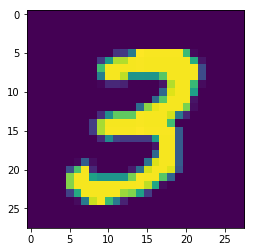

In [0]:
from scipy.misc import imread
import numpy as np

x = imread('./media/MNIST Test/test3.png',mode='L')
#compute a bit-wise inversion so black becomes white and vice versa
print(x.shape)
x = np.invert(x)
x = x.reshape(1,784).astype('float32') / 255

# Example of a train picture
plt.imshow(X_train[7].reshape(28,28))
x = X_train[7].reshape(1,784)
#perform the prediction
#model = load_model('02_logistic_regression.h5')
out = model.predict(x)
print(np.argmax(out))